## Bridges

In this notebook the bridge data was analysed and cleaned up from both a traditional data science perspective, as well as geospatially.

### Traditinal clean-up

In [1]:
import pandas as pd
import seaborn as sns
import os

In [2]:
# Import the Bridges Excel file as Pandas DataFrame
B = '../data/raw/Bridges.xlsx'
Bridge = pd.read_excel(B)
Bridge

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LocationLRPOffset,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,Unnamed: 24,BCS1TotalScore
0,1.0,Kanch pur Bridge.,PC Girder Bridge,A,14.55,394.23,1986.0,8.0,Dhaka,Dhaka,...,3976.0,8.976,23.0,42.0,7.5,90.0,30.0,57.3,NaN,0.0
1,2.0,Madanpur Bridge.(L),PC Girder Bridge,A,9.20,27.50,2003.0,1.0,Dhaka,Dhaka,...,305.0,12.660,23.0,41.0,28.4,90.0,32.0,41.6,NaN,0.0
2,3.0,Madanpur Bridge(R),PC Girder Bridge,A,9.12,27.50,2007.0,1.0,Dhaka,Dhaka,...,333.0,12.688,23.0,41.0,28.0,90.0,32.0,41.6,NaN,0.0
3,4.0,Langalbandh Bridge.,RCC Girder Bridge,B,17.80,159.52,1998.0,5.0,Dhaka,Dhaka,...,1672.0,17.134,23.0,39.0,33.9,90.0,34.0,10.9,NaN,31.0
4,5.0,Darikandi Bridge (L),PC Girder Bridge,A,9.15,20.50,2002.0,1.0,Dhaka,Dhaka,...,2260.0,17.222,23.0,39.0,21.8,90.0,34.0,27.7,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,NaN,NaN,RCC Girder Bridge,B,4.00,6.00,1992.0,1.0,Barisal,Barisal,...,410.0,2.310,22.0,36.0,52.0,90.0,40.0,50.0,NaN,1.0
3189,NaN,NaN,RCC Girder Bridge,C,6.67,20.00,2013.0,1.0,Barisal,Barisal,...,550.0,3.440,22.0,37.0,5.0,90.0,41.0,25.0,NaN,30.0
3190,NaN,NaN,Truss with Steel Deck,A,4.21,31.07,1995.0,1.0,Barisal,Barisal,...,305.0,6.692,22.0,25.0,43.5,90.0,47.0,18.1,NaN,0.0
3191,NaN,NaN,RCC Girder Bridge,B,4.06,12.00,1996.0,1.0,Barisal,Barisal,...,1717.0,8.104,22.0,25.0,48.6,90.0,46.0,30.3,NaN,30.0


In [3]:
# Drop duplicates and keep the first ones
Bridge.drop_duplicates(subset= 'StructureName', keep = 'first',inplace=True)

In [4]:
# Check if there are any NAN values
print(Bridge.columns)

Index(['Number', 'StructureName', 'StructureType', 'Condition of Bridge',
       'TotalWidth', 'TotalLength', 'ConstructionYear', 'NumberOfSpan', 'Zone',
       'Circle', 'Division', 'Sub-Division', 'RoadNo', 'Unnamed: 13',
       'StructureLRPName', 'ReferenceLRPNo', 'LocationLRPOffset',
       'LocationChainage', 'LatitudeDegree', 'LatitudeMinute',
       'LatitudeSecond', 'LongitudeDegree', 'LongitudeMinute',
       'LongitudeSecond', 'Unnamed: 24', 'BCS1TotalScore'],
      dtype='object')


In [5]:
# Delete the Unnamed:24 column
Bridge.drop('Unnamed: 24', inplace=True, axis=1, )

In [6]:
# Delete the Unnamed:13 column
Bridge.drop('Unnamed: 13', inplace=True, axis=1, )

In [7]:
# Drop all rows where there is a value missing
Bridge = Bridge.dropna()

<AxesSubplot:xlabel='TotalWidth', ylabel='Count'>

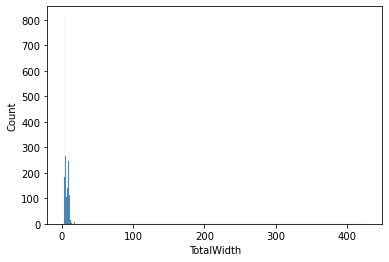

In [8]:
# plot a histogram of the total widths of the bridges in order to identify any strange outliers
sns.histplot(data = Bridge, x= "TotalWidth")

In [9]:
# check which bridges are wider than 30 meter
Bridge_width = Bridge.loc[Bridge["TotalWidth"]>30]
Bridge_width

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,ReferenceLRPNo,LocationLRPOffset,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,BCS1TotalScore
56,57.0,Shikalbaha Bridge,PC Girder Bridge,A,31.2,17.30,2010.0,1.0,Chittagong,Chittagong,...,LRP238,4794.0,247.637,22.0,18.0,55.2,91.0,51.0,19.1,0.0
1309,1310.0,Bolloppur Bridge,RCC Girder Bridge,C,428.0,10.25,1997.0,1.0,Comilla,Comilla,...,LRP005,4950.0,9.950,23.0,34.0,17.2,90.0,56.0,56.3,31.0


After checking on google these bridges, only Shikalbaha Bridge is correct, the other one is too large


In [10]:
# Drop the other bridge as it is too large
Bridge_widthindex = list(Bridge_width.index)
Bridge.drop(Bridge_widthindex,axis=0,inplace=True)

C:\Users\Ewout\AppData\Local\Temp\ipykernel_4452\2709470212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bridge.drop(Bridge_widthindex,axis=0,inplace=True)


<AxesSubplot:xlabel='TotalLength', ylabel='Count'>

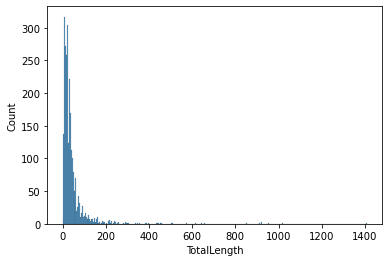

In [11]:
# plot a histogram of the total length of the bridges in order to identify any strange outliers
sns.histplot(data = Bridge, x= "TotalLength")

In [12]:
# plot bridges longer than 500 meter
Bridge_lenth = Bridge.loc[Bridge["TotalLength"]>500]
Bridge_lenth

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,ReferenceLRPNo,LocationLRPOffset,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,BCS1TotalScore
16,17.0,Meghna Bridge,PC Girder Bridge,A,9.14,924.85,1989.0,13.0,Dhaka,Dhaka,...,LRP023,1923.0,24.393,23.0,36.0,34.30,90.0,36.0,43.80,0.0
31,32.0,Daudkandi Bridge.,PC Box,A,9.13,1408.80,1995.0,17.0,Dhaka,Dhaka,...,LRP036,1634.0,37.010,23.0,31.0,47.50,90.0,41.0,42.50,0.0
55,56.0,Sha Amanot Bridge,PC Box,A,24.28,954.50,2009.0,11.0,Chittagong,Chittagong,...,LRP238,3177.0,246.020,22.0,19.0,44.90,91.0,51.0,6.00,0.0
227,228.0,Bhairab Bridge,PC Box,A,19.75,924.00,2002.0,9.0,Mymensingh,Mymensingh,...,LRP068,4427.0,71.834,24.0,2.0,55.84,90.0,59.0,30.15,0.0
439,440.0,Dhaleshwari Bridge,RCC Girder Bridge,A,7.90,506.59,1964.0,11.0,Dhaka,Dhaka,...,LRP049,9.0,48.000,23.0,52.0,51.60,90.0,1.0,42.90,0.0
445,446.0,Tora Bridge,PC Girder Bridge,B,9.30,645.66,1974.0,11.0,Dhaka,Dhaka,...,LRP056,859.0,55.866,23.0,51.0,41.50,89.0,57.0,39.00,1.0
465,466.0,Baral Bridge,PC Girder Bridge,C,10.08,573.47,1980.0,15.0,Rajshahi,Pabna,...,LRP131,92.0,129.616,24.0,8.0,4.00,89.0,35.0,5.00,30.0
581,582.0,Garai Bridge,Truss with RCC Slab,B,8.70,612.50,1991.0,7.0,Khulna,Jessore,...,LRP064,729.0,65.221,23.0,32.0,40.00,89.0,31.0,6.00,1.0
609,610.0,Postagola Bridge,PC Girder Bridge,A,17.60,847.90,1989.0,21.0,Dhaka,Dhaka,...,LRP001,1538.0,2.587,23.0,41.0,21.70,90.0,25.0,45.90,0.0
1115,1116.0,Mir Mosharraf Hosain Bridge,Truss with RCC Slab,C,10.00,504.54,2009.0,9.0,Khulna,Jessore,...,LRP065,1602.0,65.214,23.0,53.0,7.00,89.0,10.0,58.00,501.0


All bridges with a length superior to 500m are actualy existing and that large. 

In [13]:
# Drop the bridges that are longer than 500 meters
Bridge_lenthindex = list(Bridge_lenth.index)
Bridge.drop(Bridge_lenthindex,axis=0,inplace=True)

C:\Users\Ewout\AppData\Local\Temp\ipykernel_4452\31661621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bridge.drop(Bridge_lenthindex,axis=0,inplace=True)


There is no strange outliers identiefied for the length of the bridges.

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,ReferenceLRPNo,LocationLRPOffset,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,BCS1TotalScore
942,943.0,Saforpur Bridge,RCC Girder Bridge,B,4.0,24.3,2080.0,3.0,Sylhet,Moulavi Bazar,...,LRP038,1014.0,37.554,24.0,37.0,31.0,92.0,8.0,59.0,30.0


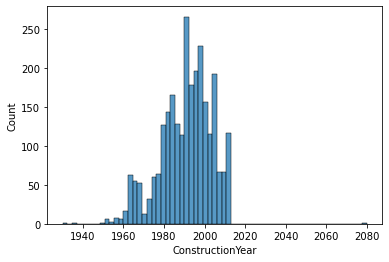

In [14]:
# plot a histogram of the construction year of the bridges in order to identify any strange outliers
sns.histplot(data = Bridge, x = 'ConstructionYear')
ConstructionYear = Bridge.loc[Bridge["ConstructionYear"]>2021]
ConstructionYear

In [15]:
# Drop the bridge that has the wrong construction date
ConstructionYearindex = list(ConstructionYear.index)
Bridge.drop(ConstructionYearindex,axis=0,inplace=True)

C:\Users\Ewout\AppData\Local\Temp\ipykernel_4452\1118635775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bridge.drop(ConstructionYearindex,axis=0,inplace=True)


This bridge is from 2080, need to be recoded to 1980 or deleted. 

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,ReferenceLRPNo,LocationLRPOffset,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,BCS1TotalScore
346,347.0,Keen Bridge,Steel Beam & RCC Slab,C,5.8,358.0,1936.0,22.0,Sylhet,Sylhet,...,LRP058,306.0,58.496,24.0,53.0,10.3,91.0,52.0,5.2,560.0


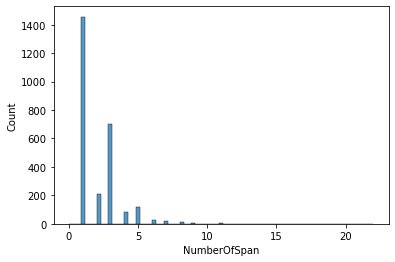

In [16]:
# plot the number of spans and show the ones greater than 20
sns.histplot(data = Bridge, x = 'NumberOfSpan')
NumberOfSpan = Bridge.loc[Bridge["NumberOfSpan"]>20]
NumberOfSpan

All these bridges were checked with google and are correct. 

In [17]:
#add a column that converts the latitude degree/minutes/seconds to decimals
Bridge['LatitudeDecimal'] = Bridge['LatitudeDegree'] + (Bridge['LatitudeMinute']/60) + (Bridge['LatitudeSecond']/3600)

C:\Users\Ewout\AppData\Local\Temp\ipykernel_4452\4240729593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bridge['LatitudeDecimal'] = Bridge['LatitudeDegree'] + (Bridge['LatitudeMinute']/60) + (Bridge['LatitudeSecond']/3600)


In [18]:
#add a column that converts the longitude degree/minutes/seconds to decimals
Bridge['LongitudeDecimal'] = Bridge['LongitudeDegree'] + (Bridge['LongitudeMinute']/60) + (Bridge['LongitudeSecond']/3600)
Bridge.head()


C:\Users\Ewout\AppData\Local\Temp\ipykernel_4452\2118044145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bridge['LongitudeDecimal'] = Bridge['LongitudeDegree'] + (Bridge['LongitudeMinute']/60) + (Bridge['LongitudeSecond']/3600)


,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
0,1.0,Kanch pur Bridge.,PC Girder Bridge,A,14.55,394.23,1986.0,8.0,Dhaka,Dhaka,...,8.976,23.0,42.0,7.5,90.0,30.0,57.3,0.0,23.702083,90.515917
1,2.0,Madanpur Bridge.(L),PC Girder Bridge,A,9.20,27.50,2003.0,1.0,Dhaka,Dhaka,...,12.660,23.0,41.0,28.4,90.0,32.0,41.6,0.0,23.691222,90.544889
2,3.0,Madanpur Bridge(R),PC Girder Bridge,A,9.12,27.50,2007.0,1.0,Dhaka,Dhaka,...,12.688,23.0,41.0,28.0,90.0,32.0,41.6,0.0,23.691111,90.544889
3,4.0,Langalbandh Bridge.,RCC Girder Bridge,B,17.80,159.52,1998.0,5.0,Dhaka,Dhaka,...,17.134,23.0,39.0,33.9,90.0,34.0,10.9,31.0,23.659417,90.569694
4,5.0,Darikandi Bridge (L),PC Girder Bridge,A,9.15,20.50,2002.0,1.0,Dhaka,Dhaka,...,17.222,23.0,39.0,21.8,90.0,34.0,27.7,0.0,23.656056,90.574361


In [19]:
# show bridges with an odd coordinate
Bridgelatitudewrong = Bridge.loc[Bridge["LatitudeDecimal"]>27]
Bridgelatitudewrong

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
2494,2495.0,Naodanga Pooler Par Bridge,RCC Girder Bridge,B,4.6,23.53,1988.0,3.0,Rangpur,Rangpur,...,18.41,89.0,33.0,49.6,25.0,56.0,49.6,30.0,89.563778,25.947111


In [20]:
# Drop the bridge that has swapped the value for longitude and latitude
Bridgelatitudewrongindex = list(Bridgelatitudewrong.index)
Bridge.drop(Bridgelatitudewrongindex,axis=0,inplace=True)

C:\Users\Ewout\AppData\Local\Temp\ipykernel_4452\3120595474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bridge.drop(Bridgelatitudewrongindex,axis=0,inplace=True)


In [21]:
# Export the Bridges DataFrame as Excel file
Bridge.to_excel("../data/interim/Bridges.xlsx", sheet_name="Bridge types and attributes")

### Geospatial clean-up

In this section all the bridges are removed if they are outside 300 meters of the land area of Bangladesh.

In [22]:
# Import GeoPandas
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

print(f'GeoPandas version: {gpd.__version__}')
print(f'Contextily version: {cx.__version__}')

GeoPandas version: 0.10.2
Contextily version: 1.2.0


In [23]:
# Read GeoJSON file with Bangladesh land area
land = gpd.read_file("../data/raw/Bangladesh_border.json")

In [24]:
# Check the datatype and CRS of the Bangladesh border
print(f'Data type of land: {type(land)}')
land.crs

Data type of land: <class 'geopandas.geodataframe.GeoDataFrame'>


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
# Convert from Geographic CRS (EPSG:4326) to Projected CRS (EPSG:3857)
land = land.to_crs(3857)
land.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

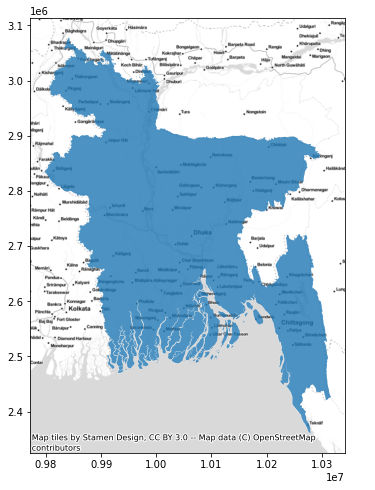

In [26]:
# Plot the Bangladesh land area
ax = land.plot(alpha=0.8, figsize=(8, 8))
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

<class 'geopandas.geoseries.GeoSeries'>


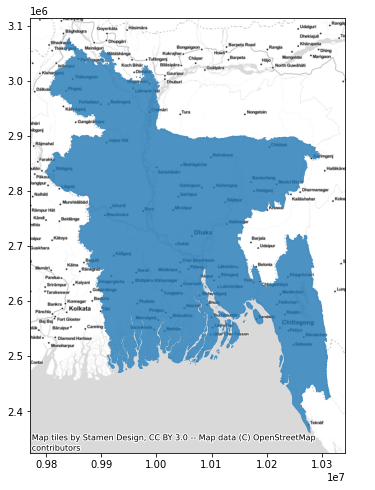

In [27]:
# Add a buffer of land around 
buffer = 500 # meter
landb = land.buffer(buffer)

# Print type and plot
print(type(landb))
ax = landb.plot(alpha=0.8, figsize=(8, 8))
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

In [28]:
# Convert GeoSeries to GeoDataFrame
landb = gpd.GeoDataFrame(geometry=gpd.GeoSeries(landb))

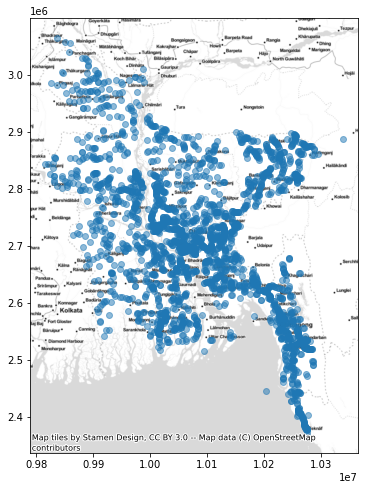

In [29]:
# Load in the bridges as a GeoDataFrame
bridge_geo = gpd.GeoDataFrame(Bridge, geometry=gpd.points_from_xy(Bridge["LongitudeDecimal"], Bridge["LatitudeDecimal"]))
bridge_geo = bridge_geo.set_crs(4326)
bridge_geo = bridge_geo.to_crs(3857)

# Plot
ax = bridge_geo.plot(alpha=0.5, figsize=(8, 8))
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

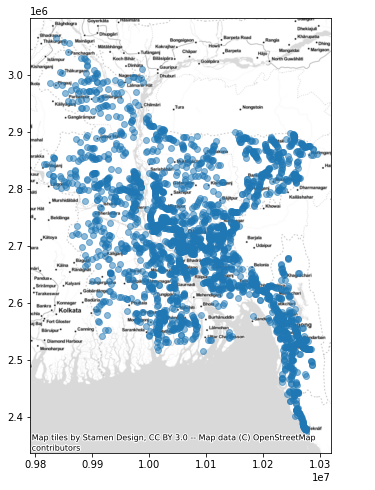

In [30]:
# Spatially select bridges inside the buffered Bangladesh border
kept_bridges = gpd.sjoin(bridge_geo, landb, predicate='within')

# Plot
ax = kept_bridges.plot(alpha=0.5, figsize=(8, 8))
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

In [31]:
# List dropped bridges
dropped = bridge_geo[~bridge_geo.index.isin(kept_bridges.index)]
print(f'{len(dropped.index)} bridges are dropped: {", ".join(dropped["StructureName"].to_list())}.')

3 bridges are dropped: Khursukul Bridge, Shaplapur Bridge, Shari Bridge.


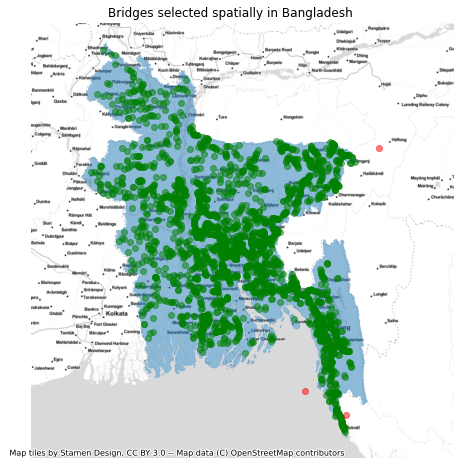

In [32]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(8, 8))

# Border, kept and dropped bridges
landb.plot(ax=ax, alpha=0.5, figsize=(8, 8))
kept_bridges.plot(ax=ax, alpha=0.5, color="green")
dropped.plot(ax=ax, alpha=0.5, color="red")

# Remove axis labels and ticks, keep them proportionate and add title
ax.set_axis_off()
ax.axis('equal')
ax.set_title(f'Bridges selected spatially in Bangladesh')

# Add a simple basemap of The Hague for visual reference
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
plt.savefig("../images/geospatial_plot_bridges.svg", dpi=200, bbox_inches='tight')

In [33]:
# Export the Bridges DataFrame as Excel file
kept_bridges.to_excel("../data/processed/Bridges.xlsx", sheet_name="Bridge types and attributes")